# DAP Lab 8

## Data Wrangling

### 1.1 Importing Data

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NA
import random
from matplotlib import pyplot
%matplotlib inline

### Import the “bodyfat.csv” file using pandas as follows. Be sure to use the correct file location.

In [2]:
bodyFat = pd.read_csv("bodyfat.csv")

#### View the first 5 lines of the data

In [3]:
bodyFat.head()

,id,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### The data contain estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for 252 men. https://www2.stetson.edu/~jrasp/data.htm The variables in the dataset are: 1. Density determined from underwater weighing 2. Percent body fat from Siri’s (1956) equation 3. Age (years) 4. Weight (lbs) 5. Height (inches) 6. Neck circumference (cm) 7. Chest circumference (cm) 8. Abdomen circumference (cm) 9. Hip circumference (cm) 10. Thigh circumference (cm) 11. Knee circumference (cm) 12. Ankle circumference (cm) 13. Biceps (extended) circumference (cm) 14. Forearm circumference (cm) 15. Wrist circumference (cm)

#### 1.2 Dealing with Missing Values

#### We are going to introduce some NAs into the data:

In [4]:
# Create copy of bodyFat
bodyFatMissing = bodyFat.copy()

# We will replace 20% of the data in the Abdomen column with NAs
replaceIndices = random.sample(range(0, 252), 50)

for item in replaceIndices:
    bodyFatMissing.loc[item, "Abdomen"] = NA

#### Let us try replacing the missing items with the mean:

In [5]:
meanReplacememt = bodyFatMissing["Abdomen"].fillna(bodyFatMissing["Abdomen"].mean())

#### Let us also try replacing the missing items with the median:

In [6]:
medianReplacememt = bodyFatMissing["Abdomen"].fillna(bodyFatMissing["Abdomen"].median())

#### We can plot histograms in order to see the effects of our imputation.

#### Original

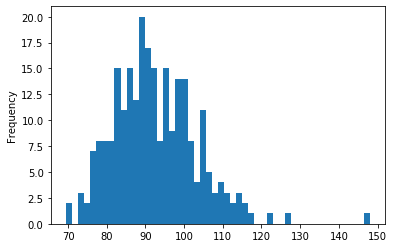

In [7]:
# Plot histograms
bodyFat["Abdomen"].plot.hist(bins=50)

#### Mean Replacement

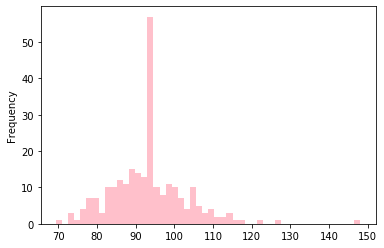

In [8]:
meanReplacememt.plot.hist(bins = 50, color="pink")

#### Median Replacement

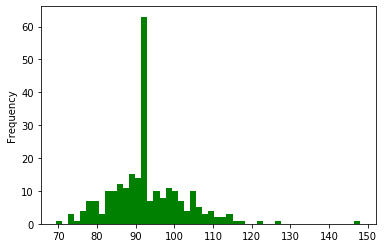

In [9]:
medianReplacememt.plot.hist(bins=50, color="green")

#### Plot all histograms overlaid

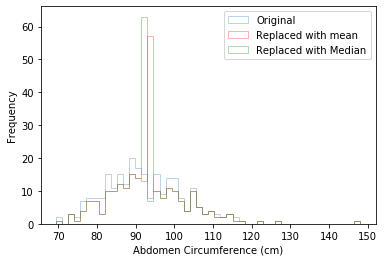

In [10]:
pyplot.hist(bodyFat["Abdomen"], bins=50, alpha=0.3, label="Original", histtype="step", stacked=True, fill=False)
pyplot.hist(meanReplacememt, bins=50, color="red", alpha=0.3, label="Replaced with mean", histtype="step", stacked=True, fill=False)
pyplot.hist(medianReplacememt, bins=50, color="green", alpha=0.3, label="Replaced with Median", histtype="step", stacked=True, fill=False)
pyplot.legend(loc="upper right")
pyplot.xlabel("Abdomen Circumference (cm)")
pyplot.ylabel("Frequency")
pyplot.show()

##### As we can see, the imputation of missing values has an effect on the distribution of the data. The mean and median values are now more frequent. For categorical data, if we aren’t able to infer the correct values with certainty, the missing values may be replaced with the mode. Also, whilst mean, median and mode imputation work, in certain cases we might want to use more advanced means (e.g. regression models). See https://pypi.org/project/fancyimpute/ for more details.

#### 1.3 Discretisation & Binarisation

#### We are going to discretise the “Age” column of our original bodyfat data. Ages 18 to 25 will be grouped as “Youth”, those from 26 to 35 as “YoungAdult”, 36 to 45 as “Adult”, 46 to 65 as “MiddleAged”, and 66 to 100 as “Senior”.

#### 1.3.1 Discretisation

In [11]:
bins=[18,25,35,45,65,100]
group_names = ["Youth", "YoungAdult", "Adult", "MiddleAged", "Senior"]
bodyFat["AgeGroups"] = pd.cut(bodyFat["Age"], bins, labels=group_names)

#### 1.3.2 Binarisation

#### A man is considered tall if his height is above 72 inches. Create a new column in the dataframe called “Tall”. The value in this column should be 1 if the height is 72 inches or above, and 0 otherwise.

In [13]:
bodyFat.to_csv('myNewFilenameHere.csv')

#### 1.4 Merging Data

#### Import the three files: guitars.csv, guitarPayment.csv and retailers.csv

In [14]:
guitars = pd.read_csv("guitars.csv")
guitarPayment = pd.read_csv("guitarPayment.csv")
retailers = pd.read_csv("retailers.csv")

In [15]:
guitars.head()

,order_id,customer_id,brand,model,colour,use_type_id
0,47856,72,Paul Reed Smith,Custom 22,Black,3
1,47857,63,Fender,Stratocaster,Fire Engine Red,2
2,47858,60,Gibson,Les Paul Standard,Sunburst,1
3,47859,69,Ibanez,SA460QM-ABB,Antique Brown Burst,3
4,47860,33,Jackson,Dinky,Yellow,3


In [16]:
guitarPayment.head()

,cost_per_month,interest_rate_per_month,loyalty_points,order_id
0,185,2.77,1.85,47861
1,411,6.17,4.11,47862
2,420,6.30,4.20,47863
3,236,3.54,2.36,47864
4,115,1.72,1.15,47865


In [17]:
retailers.head()

,Retailer,Location,Customer,model
0,Andertons,Guildford,72,Custom 22
1,Wunjo Guitars,London,63,Stratocaster
2,Pro Musica,Cork,60,Les Paul Standard
3,Waltons,Blanchardstown,69,SA460QM-ABB
4,Music Minds,Dublin,33,Dinky


#### We can see that ‘guitars’ and ‘guitarPayments’ share the attribute ‘order_id. Similarly, ’guitars’ and ‘retailers’ share the attribute ‘Model’.

#### Merge ‘guitars’ and ‘guitarPayments’ on ‘order_id’ using an outer join. What do you notice?

In [18]:
mergedOne = pd.merge(guitars, guitarPayment, on='order_id', how='outer')

In [19]:
mergedOne

,order_id,customer_id,brand,model,colour,use_type_id,cost_per_month,interest_rate_per_month,loyalty_points
0,47856,72.0,Paul Reed Smith,Custom 22,Black,3.0,NaN,NaN,NaN
1,47857,63.0,Fender,Stratocaster,Fire Engine Red,2.0,NaN,NaN,NaN
2,47858,60.0,Gibson,Les Paul Standard,Sunburst,1.0,NaN,NaN,NaN
3,47859,69.0,Ibanez,SA460QM-ABB,Antique Brown Burst,3.0,NaN,NaN,NaN
4,47860,33.0,Jackson,Dinky,Yellow,3.0,NaN,NaN,NaN
5,47861,76.0,Schecter,Hellraiser,Purple,1.0,185.0,2.77,1.85
6,47862,32.0,Epihone,Dot,Sunburst,1.0,411.0,6.17,4.11
7,47863,25.0,Rickenbacker,Model 330 12,Blonde,2.0,420.0,6.30,4.20
8,47864,57.0,G&L,Fullerton,Yellow,1.0,236.0,3.54,2.36
9,47865,66.0,Charvel,Pro-Mod,Green,3.0,115.0,1.72,1.15


#### Now try using an inner join. What’s the difference now?

In [20]:
mergedTwo = pd.merge(guitars, guitarPayment, on='order_id', how='inner')

In [21]:
mergedTwo

,order_id,customer_id,brand,model,colour,use_type_id,cost_per_month,interest_rate_per_month,loyalty_points
0,47861,76,Schecter,Hellraiser,Purple,1,185,2.77,1.85
1,47862,32,Epihone,Dot,Sunburst,1,411,6.17,4.11
2,47863,25,Rickenbacker,Model 330 12,Blonde,2,420,6.30,4.20
3,47864,57,G&L,Fullerton,Yellow,1,236,3.54,2.36
4,47865,66,Charvel,Pro-Mod,Green,3,115,1.72,1.15
5,47866,51,Fender,Stratocaster,Seafoam Green,1,361,5.42,3.61
6,47867,43,Fender,Stratocaster,Yellow,1,134,2.01,1.34
7,47868,39,Epihone,Dot,Sunburst,3,347,5.21,3.47
8,47869,37,Paul Reed Smith,SE,Blue,2,474,7.11,4.74
9,47870,40,Fender,Telecaster,Blue,2,241,3.61,2.41


#### Now merge this new dataframe with the retailers dataframe using an inner join. Experiment also with other join types.

In [22]:
mergedThree = pd.merge(mergedTwo, retailers, how='inner')

In [23]:
mergedThree

,order_id,customer_id,brand,model,colour,use_type_id,cost_per_month,interest_rate_per_month,loyalty_points,Retailer,Location,Customer
0,47861,76,Schecter,Hellraiser,Purple,1,185,2.77,1.85,X Music,Dublin,76
1,47862,32,Epihone,Dot,Sunburst,1,411,6.17,4.11,Andertons,Guildford,32
2,47862,32,Epihone,Dot,Sunburst,1,411,6.17,4.11,Pro Musica,Cork,39
3,47868,39,Epihone,Dot,Sunburst,3,347,5.21,3.47,Andertons,Guildford,32
4,47868,39,Epihone,Dot,Sunburst,3,347,5.21,3.47,Pro Musica,Cork,39
5,47863,25,Rickenbacker,Model 330 12,Blonde,2,420,6.30,4.20,Waltons,Blanchardstown,25
6,47864,57,G&L,Fullerton,Yellow,1,236,3.54,2.36,Orpheus Music,Lagos,57
7,47865,66,Charvel,Pro-Mod,Green,3,115,1.72,1.15,Andertons,Guildford,66
8,47866,51,Fender,Stratocaster,Seafoam Green,1,361,5.42,3.61,Wunjo Guitars,London,63
9,47866,51,Fender,Stratocaster,Seafoam Green,1,361,5.42,3.61,McMaster Guitars,Glasgow,51


In [24]:
mergedThree.shape

(24, 12)

#### The ‘customer_id’ and ‘Customer’ column contain the same information. Feel free to drop one of these, e.g.“data = data.drop(columns=”Customer")

In [25]:
mergedThree = mergedThree.drop(columns = "Customer")

In [26]:
mergedThree.shape

(24, 11)

#### Now let us calculate some statistics based on the brand of guitar. We can use the groupby()(https://pandas.pydata.org/pandasdocs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) function to get some statistics on the cost per month and interest rate

In [27]:
mergedThree.groupby("brand").agg({
"cost_per_month": "mean",
"interest_rate_per_month": "mean",
"colour": pd.Series.mode
})

,cost_per_month,interest_rate_per_month,colour
brand,,,
Charvel,115.000000,1.720000,Green
Epihone,379.000000,5.690000,Sunburst
Fender,246.571429,3.700000,"[Seafoam Green, Yellow]"
G&L,236.000000,3.540000,Yellow
Gibson,351.666667,5.273333,Teaburst
Ibanez,198.000000,2.970000,Antique Brown Burst
Jackson,234.000000,3.510000,Silverburst
Paul Reed Smith,293.500000,4.400000,"[Black Cherry, Blue]"
Rickenbacker,420.000000,6.300000,Blonde
